In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('D:/Chandrashekar S/New Volume/Machine learning/Kaggle Competion/titanic/train.csv',index_col=['PassengerId'])
df.head()

#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 800)
pd.set_option('display.width', 1000)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.1+ KB


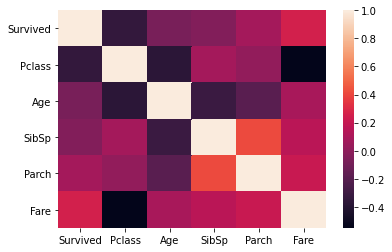

In [2]:
df.info()
sns.heatmap(df.corr())

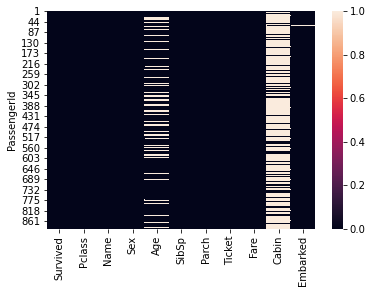

In [3]:
sns.heatmap(df.isna())

In [4]:
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)

df["Age_tf"] = df["Age"]
df.head(2)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_tf
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0


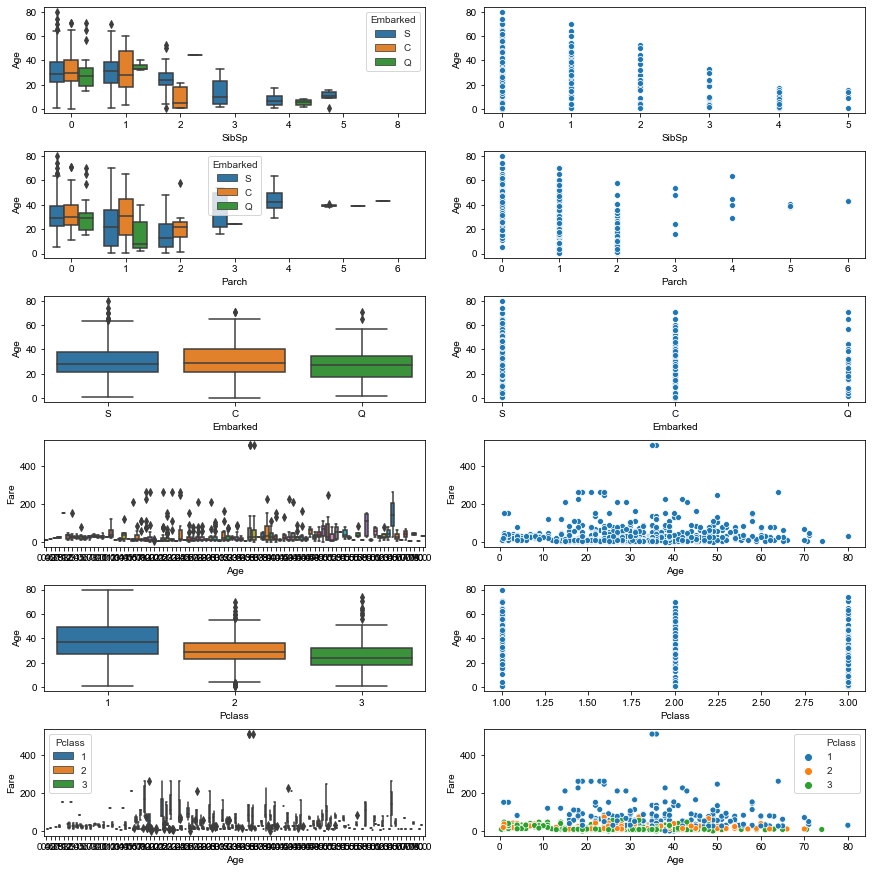

In [5]:
#filt = df.Pclass == 3
#df_pc1 = df.loc[filt,["Age","SibSp"]]
#sns.set_color_codes("dark")
fig, axs = plt.subplots(nrows=6,ncols=2,constrained_layout=True,figsize=(12,12))
sns.set_style(style='whitegrid')
#sns.scatterplot("Age",'SibSp', hue="Embarked",data=df, ax=axs[0])
#sns.scatterplot("Age",'Parch', hue="Embarked",data=df, ax=axs[1])
sns.boxplot('SibSp',"Age",hue='Embarked',data=df,palette='tab10',ax=axs[0,0])
sns.scatterplot('SibSp',"Age",data=df,palette='tab10',ax=axs[0,1])


sns.boxplot('Parch',"Age",hue='Embarked',data=df,palette='tab10',ax=axs[1,0])
sns.scatterplot('Parch',"Age",data=df,palette='tab10',ax=axs[1,1])

sns.boxplot('Embarked',"Age",data=df,palette='tab10',ax=axs[2,0])
sns.scatterplot('Embarked',"Age",data=df,palette='tab10',ax=axs[2,1])

sns.boxplot("Age",'Fare',data=df,palette='tab10',ax=axs[3,0])
sns.scatterplot("Age",'Fare',data=df,palette='tab10',ax=axs[3,1])

sns.boxplot('Pclass',"Age",data=df,palette='tab10',ax=axs[4,0])
sns.scatterplot('Pclass',"Age",data=df,palette='tab10',ax=axs[4,1])

sns.boxplot("Age",'Fare',hue='Pclass',data=df,palette='tab10',ax=axs[5,0])
sns.scatterplot("Age",'Fare',hue='Pclass',data=df,palette='tab10',ax=axs[5,1])

#plt.legend(loc='upper left')
#sns.scatterplot("Age",'Embarked',data=df,palette=Noneax=axs[3])
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.xticks([5,10,15,20,25,30,35,40,45,50,55,60,65])

#g = sns.FacetGrid(data=df, col="Age", hue="Survived")
#g.map(plt.scatter, "Age", "SibSp", alpha=.7)
#g.add_legend();

In [6]:
filt = df.Age_tf.isna() ==True
df_age_null = df.loc[filt,:]
df_age_null

df_age_null.SibSp.value_counts(),df_age_null.Parch.value_counts()

(0    137
 1     26
 8      7
 3      4
 2      3
 Name: SibSp, dtype: int64,
 0    157
 2     12
 1      8
 Name: Parch, dtype: int64)

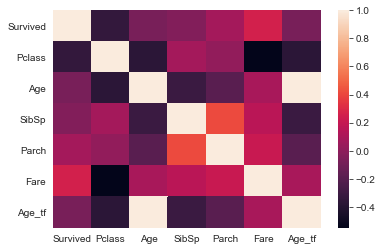

In [7]:
sns.heatmap(df.corr())

In [8]:
def age_tf(sipsp,parch,embarked,age):
    for x in df.index:
        if(np.isnan(df.Age_tf[x]) ):
            if((df.SibSp[x] == sipsp) & (df.Parch[x] == parch) & (df.Embarked[x] == embarked) ):
                df.Age_tf[x] = age
                #print(x)
                pass
            pass
        pass
    pass

age_tf(0,0,'S',29)
age_tf(0,0,'C',30)
age_tf(0,0,'Q',28)
age_tf(0,1,'S',26)
age_tf(0,1,'C',30)
age_tf(0,1,'Q',18)
age_tf(0,2,'S',20)
age_tf(0,2,'C',26)
       
age_tf(1,0,'S',29)
age_tf(1,0,'C',29)
age_tf(1,0,'Q',31)   
age_tf(1,1,'S',26)
age_tf(1,1,'C',30)
age_tf(1,1,'Q',21)
age_tf(1,2,'S',21)
age_tf(1,2,'C',25)

age_tf(2,0,'S',24)
age_tf(2,0,'C',16)
age_tf(2,0,'Q',35)   

age_tf(2,1,'S',23)
age_tf(2,1,'C',18)
age_tf(2,1,'Q',36)   

age_tf(3,0,'S',20)
age_tf(3,1,'S',16)
age_tf(3,2,'S',10)   

       


<ipython-input-8-80056572ac18>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age_tf[x] = age


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  Age_tf    883 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 105.1+ KB


In [10]:
tr = df.Age_tf.isna()==True

Agena = df.loc[tr, ["Age_tf","SibSp","Parch",'Embarked']]


Agena.Age_tf.fillna(True,inplace=True)
#sns.barplot('Parch','Age_tf',hue="Embarked",data=Agena)
Agena
#sns.barplot("SibSp",'Age',data=df)


,Age_tf,SibSp,Parch,Embarked
PassengerId,,,,
160,True,8,2,S
181,True,8,2,S
202,True,8,2,S
325,True,8,2,S
594,True,0,2,Q
793,True,8,2,S
847,True,8,2,S
864,True,8,2,S


In [11]:
age_tf(8,2,'S',10)
age_tf(0,2,'Q',28)

<ipython-input-8-80056572ac18>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age_tf[x] = age


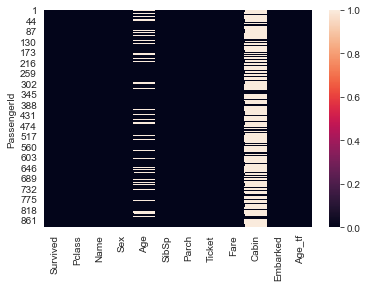

In [12]:
sns.heatmap(df.isna())

In [13]:
#df.drop(columns = ['Cabin'],inplace=True)

filt1 =df.Cabin.isna()==False
df_cabin = df.loc[filt1,:]

#sns.barplot('Cabin','Fare',data=df_cabin,orient='v')
df_cabin["Cabin_tf"] = df_cabin.Cabin.str.get(0)

<ipython-input-13-f814db736bd0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cabin["Cabin_tf"] = df_cabin.Cabin.str.get(0)


In [14]:
df_cabin.Cabin_tf.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_tf, dtype: int64

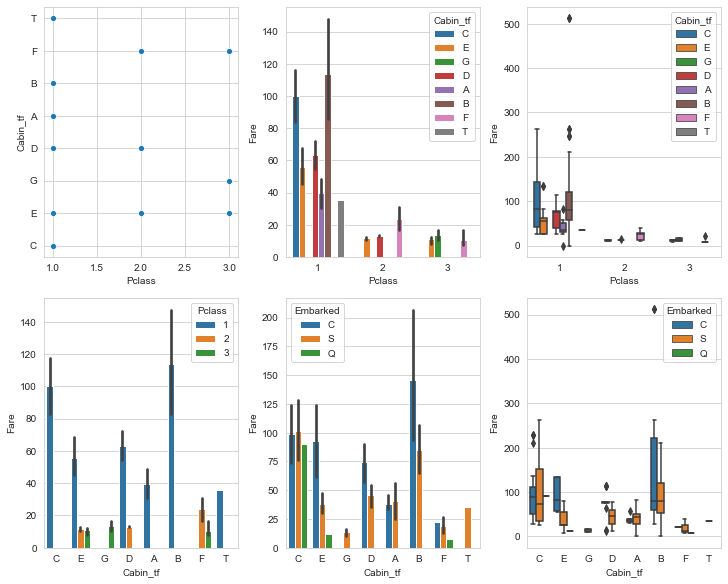

In [15]:

fig,ax  = plt.subplots(nrows=2,ncols=3,constrained_layout=True,figsize=(10,8))
sns.scatterplot("Pclass","Cabin_tf",data=df_cabin,ax=ax[0,0])
sns.barplot("Pclass","Fare",data=df_cabin,hue="Cabin_tf",ax=ax[0,1])
sns.boxplot("Pclass","Fare",data=df_cabin,hue="Cabin_tf",ax=ax[0,2])

sns.barplot("Cabin_tf","Fare",data=df_cabin,hue="Pclass",ax=ax[1,0])
sns.barplot("Cabin_tf","Fare",data=df_cabin,hue="Embarked",ax=ax[1,1])
sns.boxplot("Cabin_tf","Fare",data=df_cabin,hue="Embarked",ax=ax[1,2])

#sns.countplot("Cabin_tf",data=df_cabin,hue="Pclass",ax=ax[1,2])

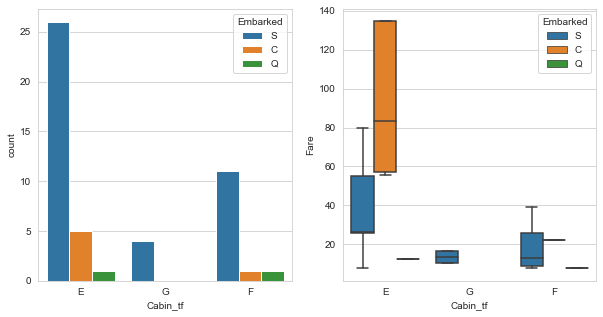

In [16]:
filt0 = (df_cabin["Cabin_tf"] == 'E') | (df_cabin["Cabin_tf"] == 'G') | (df_cabin["Cabin_tf"] == 'F')
x = df_cabin.loc[filt0,:]
fig,axs=plt.subplots(ncols=2,figsize=(10,5))
sns.countplot('Cabin_tf',hue="Embarked",data=x,ax=axs[0])
sns.boxplot('Cabin_tf','Fare',hue="Embarked",data=x,ax=axs[1])


In [17]:
df['cabin_tf'] = df['Cabin'].str.get(0)
df['cabin_tf'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  Age_tf    891 non-null    float64
 12  cabin_tf  204 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 108.6+ KB


In [18]:
cabin_p1 = ["A","B","C","D"]
cabin_p2 = ["D","E","F"]
cabin_p3 = ["E","F","G"]

for i in cabin_p1:
    filt2 = (df_cabin.Pclass == 1) & (df_cabin.Embarked == 'C') & (df_cabin.Cabin_tf == i) 
    #min_Fare =  df_cabin.loc[filt2,"Fare"].min()
    describe_Fare = df_cabin.loc[filt2,"Fare"].describe()
    print(f'Pclass:1 & Embarked: C & Cabin:{i} = Fare:{describe_Fare}')
    pass
for i in cabin_p1:
    filt2 = (df_cabin.Pclass == 1) & (df_cabin.Embarked == 'S') & (df_cabin.Cabin_tf == i) 
    #min_Fare =  df_cabin.loc[filt2,"Fare"].min()
    describe_Fare = df_cabin.loc[filt2,"Fare"].describe()
    print(f'Pclass:1 & Embarked: S & Cabin:{i} = Fare:{describe_Fare}')
    pass
for i in cabin_p1:
    filt2 = (df_cabin.Pclass == 1) & (df_cabin.Embarked == 'Q') & (df_cabin.Cabin_tf == i) 
    describe_Fare = df_cabin.loc[filt2,"Fare"].describe()
    print(f'Pclass:1 & Embarked: Q & Cabin:{i} = Fare:{describe_Fare}')
    pass
print("-------------------------------------------------------------------------")
for i in cabin_p2:
    filt2 = (df_cabin.Pclass == 2) & (df_cabin.Embarked == 'C') & (df_cabin.Cabin_tf == i) 
    #min_Fare =  df_cabin.loc[filt2,"Fare"].min()
    describe_Fare = df_cabin.loc[filt2,"Fare"].describe()
    print(f'Pclass:2 & Embarked: C & Cabin:{i} = Fare:{describe_Fare}')
    pass 
for i in cabin_p2:
    filt2 = (df_cabin.Pclass == 2) & (df_cabin.Embarked == 'S') & (df_cabin.Cabin_tf == i) 
    #min_Fare =  df_cabin.loc[filt2,"Fare"].min()
    describe_Fare = df_cabin.loc[filt2,"Fare"].describe()
    print(f'Pclass:2 & Embarked: S & Cabin:{i} = Fare:{describe_Fare}')
    pass
for i in cabin_p2:
    filt2 = (df_cabin.Pclass == 2) & (df_cabin.Embarked == 'Q') & (df_cabin.Cabin_tf == i) 
    describe_Fare = df_cabin.loc[filt2,"Fare"].describe()
    print(f'Pclass:2 & Embarked: Q & Cabin:{i} = Fare:{describe_Fare}')
    pass
print("-------------------------------------------------------------------------")
for i in cabin_p3:
    filt2 = (df_cabin.Pclass == 3) & (df_cabin.Embarked == 'C') & (df_cabin.Cabin_tf == i) 
    #min_Fare =  df_cabin.loc[filt2,"Fare"].min()
    describe_Fare = df_cabin.loc[filt2,"Fare"].describe()
    print(f'Pclass:3 & Embarked: C & Cabin:{i} = Fare:{describe_Fare}')
    pass
for i in cabin_p3:
    filt2 = (df_cabin.Pclass == 3) & (df_cabin.Embarked == 'S') & (df_cabin.Cabin_tf == i) 
    #min_Fare =  df_cabin.loc[filt2,"Fare"].min()
    describe_Fare = df_cabin.loc[filt2,"Fare"].describe()
    print(f'Pclass:3 & Embarked: S & Cabin:{i} = Fare:{describe_Fare}')
    pass
for i in cabin_p3:
    filt2 = (df_cabin.Pclass == 3) & (df_cabin.Embarked == 'Q') & (df_cabin.Cabin_tf == i) 
    describe_Fare = df_cabin.loc[filt2,"Fare"].describe()
    print(f'Pclass:3 & Embarked: Q & Cabin:{i} = Fare:{describe_Fare}')
    pass



Pclass:1 & Embarked: C & Cabin:A = Fare:count     7.000000
mean     38.357743
std       8.984154
min      30.695800
25%      32.827100
50%      35.500000
75%      39.862500
max      56.929200
Name: Fare, dtype: float64
Pclass:1 & Embarked: C & Cabin:B = Fare:count     22.000000
mean     145.964018
std      141.421688
min       27.720800
25%       58.979200
50%       79.200000
75%      222.270800
max      512.329200
Name: Fare, dtype: float64
Pclass:1 & Embarked: C & Cabin:C = Fare:count     21.000000
mean      98.582533
std       61.646341
min       27.750000
25%       49.504200
50%       89.104200
75%      110.883300
max      227.525000
Name: Fare, dtype: float64
Pclass:1 & Embarked: C & Cabin:D = Fare:count     11.000000
mean      85.586000
std       18.247747
min       63.358300
25%       76.510450
50%       76.729200
75%       95.770850
max      113.275000
Name: Fare, dtype: float64
Pclass:1 & Embarked: S & Cabin:A = Fare:count     8.000000
mean     40.731763
std      23.959028
min

In [19]:
for x in df.index:
    check = df.loc[x,"cabin_tf"]
    #print(check)
    if (df.loc[x,"cabin_tf"] is np.nan): 
        if(df.Pclass[x] == 1):
            if(df.Embarked[x] == 'C'):
                if(0 < df.Fare[x] < 145):
                    df.cabin_tf[x] = 'C'
                else:
                    df.cabin_tf[x] = 'B'
            if(df.Embarked[x] == 'S'):
                if(0 < df.Fare[x] < 101):
                    df.cabin_tf[x] = 'C'
                else:
                    df.cabin_tf[x] = 'B'
            if(df.Embarked[x] == 'Q'):
                df.cabin_tf[x] = 'C'

        if(df.Pclass[x] == 2):
            if(df.Embarked[x] == 'C'):
                if(0 < df.Fare[x] < 80):
                    df.cabin_tf[x] = 'D'
                    pass
                else:
                    df.cabin_tf[x] = 'E'
                    pass
                pass
            if(df.Embarked[x] == 'S'):
                if(0 < df.Fare[x] < 22):
                    df.cabin_tf[x] = 'F'
                    pass
                elif(22 < df.Fare[x] < 40):
                    df.cabin_tf[x] = 'E'
                    pass
                else:
                    df.cabin_tf[x] = 'D'
                    pass
                pass
            if(df.Embarked[x] == 'Q'):
                if(0 < df.Fare[x] < 10):
                    df.cabin_tf[x] = 'F'
                    pass
                else:
                    df.cabin_tf[x] = 'E'
                pass
            pass
        if(df.Pclass[x] == 3):
            if(df.Embarked[x] == 'C'):
                if(0 < df.Fare[x] < 25):
                    df.cabin_tf[x] = 'F'
                    pass
                else:
                    df.cabin_tf[x] = 'E'
                    pass
                pass
            if(df.Embarked[x] == 'S'):
                if(0 < df.Fare[x] < 15):
                    df.cabin_tf[x] = 'G'
                    pass
                elif(15 < df.Fare[x] < 25):
                    df.cabin_tf[x] = 'F'
                    pass
                else:
                    df.cabin_tf[x] = 'E'
                    pass
                pass
            if(df.Embarked[x] == 'Q'):
                if(0 < df.Fare[x] < 5):
                    df.cabin_tf[x] = 'F'
                    pass
                else:
                    df.cabin_tf[x] = 'E'
                    pass
                pass
          
           


<ipython-input-19-60095bbe4847>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cabin_tf[x] = 'G'
<ipython-input-19-60095bbe4847>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cabin_tf[x] = 'E'
<ipython-input-19-60095bbe4847>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cabin_tf[x] = 'F'
<ipython-input-19-60095bbe4847>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  Age_tf    891 non-null    float64
 12  cabin_tf  891 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 108.6+ KB


In [21]:
df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_tf,cabin_tf
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,G
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,G
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,G


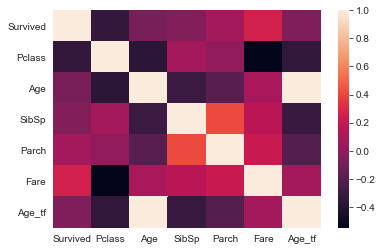

In [22]:
#sns.jointplot(x=['Age','Fare'],y='Survived',data=df)
sns.heatmap(df.corr())
#df.info()

In [23]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_tf', 'cabin_tf'], dtype='object')

In [24]:
#for x in df.columns:
#    print(f'{x} : {df[x].value_counts()} \n') 

In [25]:
df.Name

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [26]:
 names = df['Name'].str.split(',',expand=True)
df['surname'] = names[0]
df['Names'] = names[1]
#df.drop(columns = ['Name'],inplace=True)
#df.rename(columns={'Names':'Name'},inplace=True)


Marriage_status = df['Names'].str.split('.',expand=True)
df['Marriage_status'] = Marriage_status[0]
df.head()                                             

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_tf,cabin_tf,surname,Names,Marriage_status
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,G,Braund,Mr. Owen Harris,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,G,Heikkinen,Miss. Laina,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,C,Futrelle,Mrs. Jacques Heath (Lily May Peel),Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,G,Allen,Mr. William Henry,Mr


In [27]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

LB = LabelEncoder()
df['Sex_tf'] = LB.fit_transform(df['Sex'])

#Sex_OH =  OneHotEncoder().fit_transform(df[['Sex_tf']]).toarray()

#df['gender_male'] = Sex_OH[:,1]
#df['gender_female'] = Sex_OH[:,0]
#df.drop(columns=['Sex_tf'],inplace=True)
#df.drop(columns=['Names'],inplace=True)
df.head(4)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_tf,cabin_tf,surname,Names,Marriage_status,Sex_tf
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,G,Braund,Mr. Owen Harris,Mr,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Mrs,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,G,Heikkinen,Miss. Laina,Miss,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,C,Futrelle,Mrs. Jacques Heath (Lily May Peel),Mrs,0


In [28]:
df['Embarked_tf']= LB.fit_transform(df.Embarked)
#OH_embarked = OneHotEncoder().fit_transform(df[['Embarked_tf']]).toarray()
#lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
#df['Embarked_S'] = OH_embarked[:,2]
#df['Embarked_Q'] = OH_embarked[:,1]
#df['Embarked_C'] = OH_embarked[:,0]
#df.drop(columns=['Embarked_tf'],inplace=True)
df.head()
 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_tf,cabin_tf,surname,Names,Marriage_status,Sex_tf,Embarked_tf
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,G,Braund,Mr. Owen Harris,Mr,1,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Mrs,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,G,Heikkinen,Miss. Laina,Miss,0,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,C,Futrelle,Mrs. Jacques Heath (Lily May Peel),Mrs,0,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,G,Allen,Mr. William Henry,Mr,1,2


In [29]:
df.info()
df.Marriage_status.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Name             891 non-null    object 
 3   Sex              891 non-null    object 
 4   Age              714 non-null    float64
 5   SibSp            891 non-null    int64  
 6   Parch            891 non-null    int64  
 7   Ticket           891 non-null    object 
 8   Fare             891 non-null    float64
 9   Cabin            204 non-null    object 
 10  Embarked         891 non-null    object 
 11  Age_tf           891 non-null    float64
 12  cabin_tf         891 non-null    object 
 13  surname          891 non-null    object 
 14  Names            891 non-null    object 
 15  Marriage_status  891 non-null    object 
 16  Sex_tf           891 non-null    int32  
 17  Embarked_tf     

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Col               2
 Mlle              2
 Mme               1
 Don               1
 Ms                1
 Lady              1
 Jonkheer          1
 Capt              1
 Sir               1
 the Countess      1
Name: Marriage_status, dtype: int64

In [30]:
#for x in df.index:
    #print(df.Marriage_status[x])
#    if (df.Marriage_status[x] != " Mr"): # or " Miss" or " Mrs" or " Master"):
#        print(df.Marriage_status[x])
        #df.Marriage_status[x] = 'others'
#    elif (df.Marriage_status[x] != " Miss"):
        #df.Marriage_status[x] = 'others'
#    elif (df.Marriage_status[x] != " Mrs"):
        #df.Marriage_status[x] = 'others'
#    elif (df.Marriage_status[x] != " Master"):
        #df.Marriage_status[x] = 'others'
#    pass

#df = pd.get_dummies(df, columns=['Marriage_status'], prefix = ['Name_prefix'])


df['gender_status_tf']= LB.fit_transform(df.Marriage_status)


df.head()    
#print(df.Marriage_status[x])
#df.Marriage_status.value_counts()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_tf,cabin_tf,surname,Names,Marriage_status,Sex_tf,Embarked_tf,gender_status_tf
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,G,Braund,Mr. Owen Harris,Mr,1,2,11
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Mrs,0,0,12
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,G,Heikkinen,Miss. Laina,Miss,0,2,8
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,C,Futrelle,Mrs. Jacques Heath (Lily May Peel),Mrs,0,2,12
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,G,Allen,Mr. William Henry,Mr,1,2,11


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          891 non-null    int64  
 1   Pclass            891 non-null    int64  
 2   Name              891 non-null    object 
 3   Sex               891 non-null    object 
 4   Age               714 non-null    float64
 5   SibSp             891 non-null    int64  
 6   Parch             891 non-null    int64  
 7   Ticket            891 non-null    object 
 8   Fare              891 non-null    float64
 9   Cabin             204 non-null    object 
 10  Embarked          891 non-null    object 
 11  Age_tf            891 non-null    float64
 12  cabin_tf          891 non-null    object 
 13  surname           891 non-null    object 
 14  Names             891 non-null    object 
 15  Marriage_status   891 non-null    object 
 16  Sex_tf            891 non-null    int32  
 1

In [32]:
#df.surname.value_counts()
#df = pd.get_dummies(df, columns=['surname'], prefix = ['surname'])
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_tf,cabin_tf,surname,Names,Marriage_status,Sex_tf,Embarked_tf,gender_status_tf
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,G,Braund,Mr. Owen Harris,Mr,1,2,11
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Mrs,0,0,12
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,G,Heikkinen,Miss. Laina,Miss,0,2,8


In [33]:
#codes, uniques= pd.factorize(df['surname'])

#df.head(3)

In [34]:
#sns.countplot('Embarked_tf' ,data=df_final, hue='Survived',orient='v')

In [35]:

df['cabin_tf']= LB.fit_transform(df.cabin_tf)
#df = pd.get_dummies(df, columns=['cabin_tf'], prefix = ['cabin_'])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_tf,cabin_tf,surname,Names,Marriage_status,Sex_tf,Embarked_tf,gender_status_tf
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,6,Braund,Mr. Owen Harris,Mr,1,2,11
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,2,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Mrs,0,0,12
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,6,Heikkinen,Miss. Laina,Miss,0,2,8
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,2,Futrelle,Mrs. Jacques Heath (Lily May Peel),Mrs,0,2,12
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,6,Allen,Mr. William Henry,Mr,1,2,11


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          891 non-null    int64  
 1   Pclass            891 non-null    int64  
 2   Name              891 non-null    object 
 3   Sex               891 non-null    object 
 4   Age               714 non-null    float64
 5   SibSp             891 non-null    int64  
 6   Parch             891 non-null    int64  
 7   Ticket            891 non-null    object 
 8   Fare              891 non-null    float64
 9   Cabin             204 non-null    object 
 10  Embarked          891 non-null    object 
 11  Age_tf            891 non-null    float64
 12  cabin_tf          891 non-null    int32  
 13  surname           891 non-null    object 
 14  Names             891 non-null    object 
 15  Marriage_status   891 non-null    object 
 16  Sex_tf            891 non-null    int32  
 1

In [37]:
df_final = df

df.drop(columns=['Name','Sex','Age','Ticket','Names','Cabin','Marriage_status','Embarked','surname'],inplace=True)
df_final.head(2)

,Survived,Pclass,SibSp,Parch,Fare,Age_tf,cabin_tf,Sex_tf,Embarked_tf,gender_status_tf
PassengerId,,,,,,,,,,
1,0,3,1,0,7.2500,22.0,6,1,2,11
2,1,1,1,0,71.2833,38.0,2,0,0,12


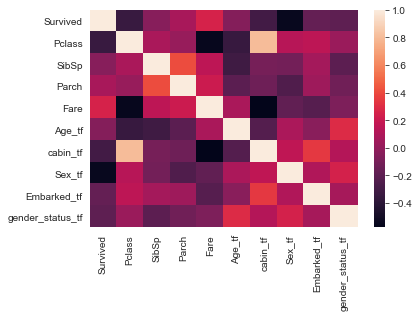

In [38]:
sns.heatmap(df_final.corr())

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          891 non-null    int64  
 1   Pclass            891 non-null    int64  
 2   SibSp             891 non-null    int64  
 3   Parch             891 non-null    int64  
 4   Fare              891 non-null    float64
 5   Age_tf            891 non-null    float64
 6   cabin_tf          891 non-null    int32  
 7   Sex_tf            891 non-null    int32  
 8   Embarked_tf       891 non-null    int32  
 9   gender_status_tf  891 non-null    int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 94.6 KB


In [40]:
x = df_final.iloc[:,1:]
y = df_final.Survived


#from sklearn.preprocessing import Normalizer

#Norm = Normalizer()
#x = Norm.fit_transform(x)

#dx = pd.DataFrame(x)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

x

,Pclass,SibSp,Parch,Fare,Age_tf,cabin_tf,Sex_tf,Embarked_tf,gender_status_tf
PassengerId,,,,,,,,,
1,3,1,0,7.2500,22.0,6,1,2,11
2,1,1,0,71.2833,38.0,2,0,0,12
3,3,0,0,7.9250,26.0,6,0,2,8
4,1,1,0,53.1000,35.0,2,0,2,12
5,3,0,0,8.0500,35.0,6,1,2,11
...,...,...,...,...,...,...,...,...,...
887,2,0,0,13.0000,27.0,5,1,2,14
888,1,0,0,30.0000,19.0,1,0,2,8
889,3,1,2,23.4500,21.0,5,0,2,8


In [58]:


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB,CategoricalNB,ComplementNB
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

preprocessors = {'StandardScaler':StandardScaler(),
                'MinMax':MinMaxScaler(),
                 'Robust':RobustScaler(),
                 'Normalizer':Normalizer()                
                }
Models = {'LR':LogisticRegression(),
          'SGD':SGDClassifier(),
          'KN':KNeighborsClassifier(n_neighbors=10),
          'BernouliNB':BernoulliNB(),
          'GaussiaNB':GaussianNB(),
          #'MutlinomialNB':MultinomialNB(),
          #'CategoricalNB':CategoricalNB(),
          #'ComplementNB':ComplementNB(),
          'SVC':SVC(),
          #'LSVC':LinearSVC(),
          'NuSVC':NuSVC(),
          'RFC':RandomForestClassifier(),
          'AdaBoost':AdaBoostClassifier(),
          'GradBoost':GradientBoostingClassifier(),
          'BaggingBoost':BaggingClassifier(),
          'ExtraTrees':ExtraTreesClassifier(),
          #'Voting':VotingClassifier(),
          'DecissionTree':DecisionTreeClassifier()            
        }


#LEftout classifiers
  # Gaussian Process Classification (GPC)

Best_preprocessor = ''
Best_model = ''
Best_accuracy_train_score = 0
Best_accuracy_test_score = 0

Random_state_map=[]
state = 0

In [61]:

#for st in range(50):
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
for i,pp in preprocessors.items():
    for j,classifier in Models.items():
        pipe_model = Pipeline([(i,pp),(j,classifier)])
        pipe_model.fit(X_train,y_train)
        yp=pipe_model.predict(X_test)
            #print(f'{i} & {j} Train Score: {pipe_model.score(X_train,y_train)}, Test Score:{pipe_model.score(X_test,y_test)} ')
            #if(pipe_model.score(X_test,y_test) > Best_accuracy_test_score) |(pipe_model.score(X_train,y_train) > Best_accuracy_train_score)  :
                #Best_preprocessor = i
                #Best_model = j
                #Best_accuracy_train_score = pipe_model.score(X_train,y_train)
                #Best_accuracy_test_score = pipe_model.score(X_test,y_test)
                #Random_state_map.append(pipe_model.score(X_test,y_test))
                #state=st
                #pass
        if((accuracy_score(y_test,yp) > Best_accuracy_test_score) & (pipe_model.score(X_train,y_train) > Best_accuracy_train_score)):
            Best_preprocessor = i
            Best_model = j
            Best_accuracy_train_score =  pipe_model.score(X_train,y_train)   
            Best_accuracy_test_score = accuracy_score(y_test,yp)
            Random_state_map.append(accuracy_score(y_test,yp))
            #state=st
            pass
        pass
    pass


print('------------------------------------------------------------------------------')
print("The Best preprocessor and model with score")
print ( Best_preprocessor,Best_model,Best_accuracy_train_score,Best_accuracy_test_score)
        

    

------------------------------------------------------------------------------
The Best preprocessor and model with score
StandardScaler SVC 0.8443017656500803 0.8507462686567164


In [53]:
state  #best(Robust, RFC, 1.0 ,0.9050279329608939)


4

In [44]:
test = pd.read_csv('project_test_tf_2.csv',index_col ='PassengerId')
test.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pclass               418 non-null    int64  
 1   SibSp                418 non-null    int64  
 2   Parch                418 non-null    int64  
 3   Fare                 418 non-null    float64
 4   Age_tf               418 non-null    float64
 5   gender_male          418 non-null    float64
 6   gender_female        418 non-null    float64
 7   Embarked_S           418 non-null    float64
 8   Embarked_Q           418 non-null    float64
 9   Embarked_C           418 non-null    float64
 10  Name_prefix_ Col     418 non-null    int64  
 11  Name_prefix_ Dona    418 non-null    int64  
 12  Name_prefix_ Dr      418 non-null    int64  
 13  Name_prefix_ Master  418 non-null    int64  
 14  Name_prefix_ Miss    418 non-null    int64  
 15  Name_prefix_ Mr      418 non-null    

In [45]:
x.head()

,Pclass,SibSp,Parch,Fare,Age_tf,cabin_tf,Sex_tf,Embarked_tf,gender_status_tf
PassengerId,,,,,,,,,
1,3,1,0,7.2500,22.0,6,1,2,11
2,1,1,0,71.2833,38.0,2,0,0,12
3,3,0,0,7.9250,26.0,6,0,2,8
4,1,1,0,53.1000,35.0,2,0,2,12
5,3,0,0,8.0500,35.0,6,1,2,11


In [46]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [47]:
t=0
best = 0
st = 200
Best_pipeline = Pipeline([('MinMax',Normalizer()),('RFC',RandomForestClassifier())])
for i in range(st):
    #print(i)
    X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    Best_pipeline.fit(X_train,y_train)
    Best_pipeline.score(X_train,y_train)
    
    if(Best_pipeline.score(X_train,y_train) > best):
        best = Best_pipeline.score(X_train,y_train)
        t=i
        
#Titanic_result = pd.DataFrame(Yp)


In [48]:
t

32

In [128]:
Best_pipeline = Pipeline([('MinMax',MinMaxScaler()),('RFC',RandomForestClassifier( n_estimators=100,max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto'))])
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
#from sklearn.model_selection import KFold


Best_pipeline.fit(X_train,y_train)
Best_pipeline.score(X_train,y_train)
r = Best_pipeline.predict(X_test)
accuracy_score(y_test,r)


0.8134328358208955

In [50]:
Best_pipeline = Pipeline([('MinMax',Normalizer()),('RFC',RandomForestClassifier(n_estimators=307, random_state=1))])
Best_pipeline.fit(x, y)


from sklearn.model_selection import cross_val_score
RF_accuracies = cross_val_score(estimator = Best_pipeline, X = x, y =y, cv = 10)
print("Mean_RF_Acc : ", RF_accuracies.mean())

Mean_RF_Acc :  0.8036079900124845


In [51]:
#Yp = Best_pipeline.predict(X_test)

#Best_pipeline.score(X_test,y_test)
#accuracy_score(y_test,Yp)

In [52]:
result=Best_pipeline.predict(test)
Titanic_result = pd.DataFrame(result)
Titanic_result
#0.9831649831649831 - minmax and RFC

ValueError: Number of features of the model must match the input. Model n_features is 9 and input n_features is 26 

In [ ]:
#Titanic_result.to_csv("titanic_results_14june2020_1.csv")


In [ ]:
"""
score = []

for st in range(1,50):
    X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=st)
    from sklearn.ensemble import RandomForestClassifier
    RF = RandomForestClassifier(random_state=st)
    RF.fit(X_train,y_train)
    yp = RF.predict(X_test)
    score.append(RF.score(X_test,y_test))
        
max(score)
"""